In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv("IRIS.csv")

In [14]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


 # Data cleaning

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


* There are no null values 
* There are 150 entries and 5 columns

In [16]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [18]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [19]:
df_copy = df.drop_duplicates(keep = 'first')

In [20]:
df_copy

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [22]:
df_copy["species"] = np.where(df_copy["species"] == "Iris-versicolor", "versicolor", df_copy["species"])

df_copy["species"] = np.where(df_copy["species"] == "Iris-virginica", "virginica", df_copy["species"])

df_copy["species"] = np.where(df_copy["species"] == "Iris-setosa", "setosa", df_copy["species"])



In [23]:
df_copy["species"].value_counts()

versicolor    50
virginica     49
setosa        48
Name: species, dtype: int64

# Exploratory data analysis

In [24]:
df_copy.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot: >

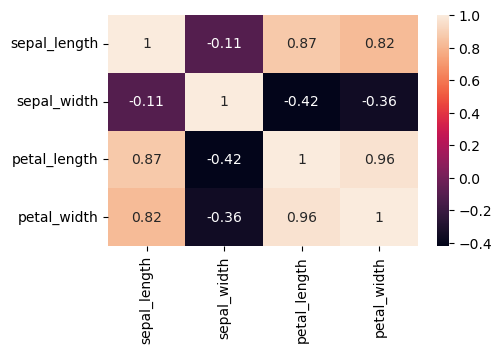

In [30]:
plt.figure(figsize=(5,3))
sns.heatmap(df_copy.corr() , annot=True)

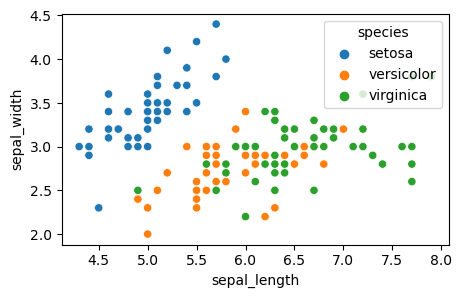

In [31]:
plt.figure(figsize=(5,3))
sns.scatterplot(x = 'sepal_length' , y = 'sepal_width' , data = df_copy , hue = "species" )
plt.show()

# segregating independent and dependent features

In [32]:
df_copy

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [33]:
X = df_copy.drop('species' , axis = 1)

In [34]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [35]:
from sklearn.preprocessing import OrdinalEncoder

In [36]:
encoder = OrdinalEncoder(categories=[["setosa" , "versicolor" , "virginica"]])

In [37]:
arr = encoder.fit_transform(df_copy[["species"]])
arr

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [42]:
df2 = pd.DataFrame(arr, columns = encoder.get_feature_names_out())

In [43]:
df2

,species
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
142,2.0
143,2.0
144,2.0
145,2.0


In [44]:
y = df2["species"]  # dependent feature

In [45]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
142    2.0
143    2.0
144    2.0
145    2.0
146    2.0
Name: species, Length: 147, dtype: float64

In [47]:
type(y), y.shape

(pandas.core.series.Series, (147,))

# train test split

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.33 , random_state=42)

In [50]:

X_train.shape , X_test.shape

((98, 4), (49, 4))

# In Decision Tree, don't perform feature scaling

#  Post pruning

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
classifier = DecisionTreeClassifier(criterion='entropy')

In [53]:
classifier.fit(X_train , y_train)

DecisionTreeClassifier(criterion='entropy')

In [54]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
75,6.6,3.0,4.4,1.4
67,5.8,2.7,4.1,1.0
28,5.2,3.4,1.4,0.2
42,4.4,3.2,1.3,0.2
62,6.0,2.2,4.0,1.0


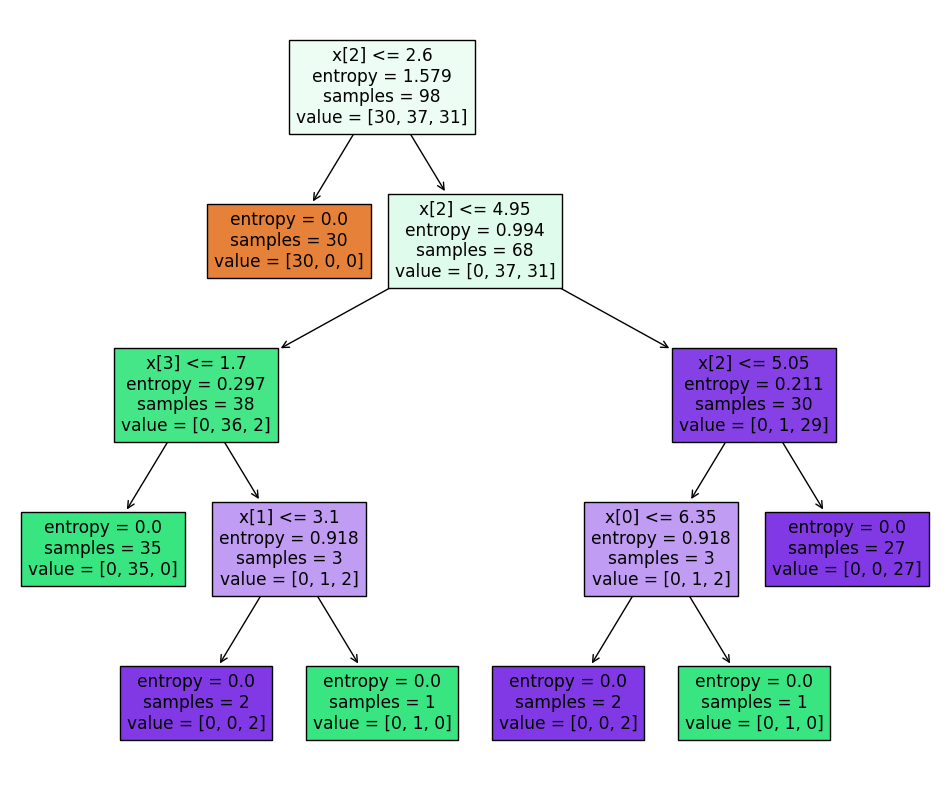

In [55]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)
plt.show()

* from second level , it is not necessary to do futher splitting

In [56]:
classifier = DecisionTreeClassifier(criterion='entropy' , max_depth=2)

In [57]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

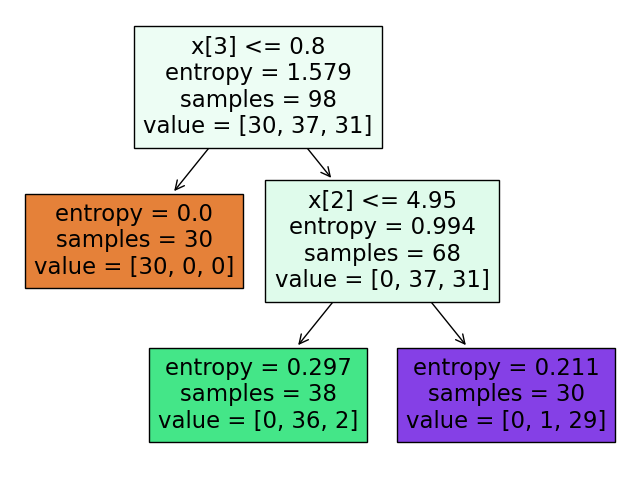

In [58]:
from sklearn import tree
plt.figure(figsize=(8,6))
tree.plot_tree(classifier,filled=True)
plt.show()

In [59]:
y_pred = classifier.predict(X_test)

In [60]:
y_pred

array([1., 1., 2., 0., 1., 0., 1., 0., 2., 0., 0., 1., 2., 1., 2., 1., 0.,
       1., 1., 0., 0., 2., 0., 2., 1., 0., 1., 2., 1., 0., 2., 0., 1., 0.,
       0., 2., 2., 2., 0., 0., 0., 2., 1., 2., 1., 1., 2., 2., 0.])

#  Performance analysis

In [61]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [62]:
conf_matrix = confusion_matrix(y_test,y_pred)

In [63]:
conf_matrix

array([[18,  0,  0],
       [ 0, 12,  1],
       [ 0,  4, 14]])

In [64]:
accuracy = accuracy_score(y_test,y_pred)

In [65]:
accuracy

0.8979591836734694

# Pre pruning

In [66]:
parameters = {
    'criterion' : ['ginni' , 'entropy' , 'log_loss'],
    'splitter' : ['best','random'],
    'max_depth' : [1,2,3,4,5],
    'max_features':['auto' , 'sqrt' , 'log2']
}

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
classifier = DecisionTreeClassifier()
clf = GridSearchCV(classifier , param_grid=parameters , cv=5 , scoring = 'accuracy', verbose=3 )

In [69]:
clf.fit(X_train , y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END criterion=ginni, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=ginni, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=ginni, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=ginni, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=ginni, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=ginni, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=ginni, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=ginni, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=ginni, max_depth=1, max_features=auto, splitter=rando

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['ginni', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [70]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [71]:
clf.best_score_

0.9694736842105263

In [73]:
classifier = DecisionTreeClassifier(criterion='log_loss' , max_depth=3 , max_features='sqrt' , splitter='best')

In [74]:
classifier.fit(X_train , y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=3, max_features='sqrt')

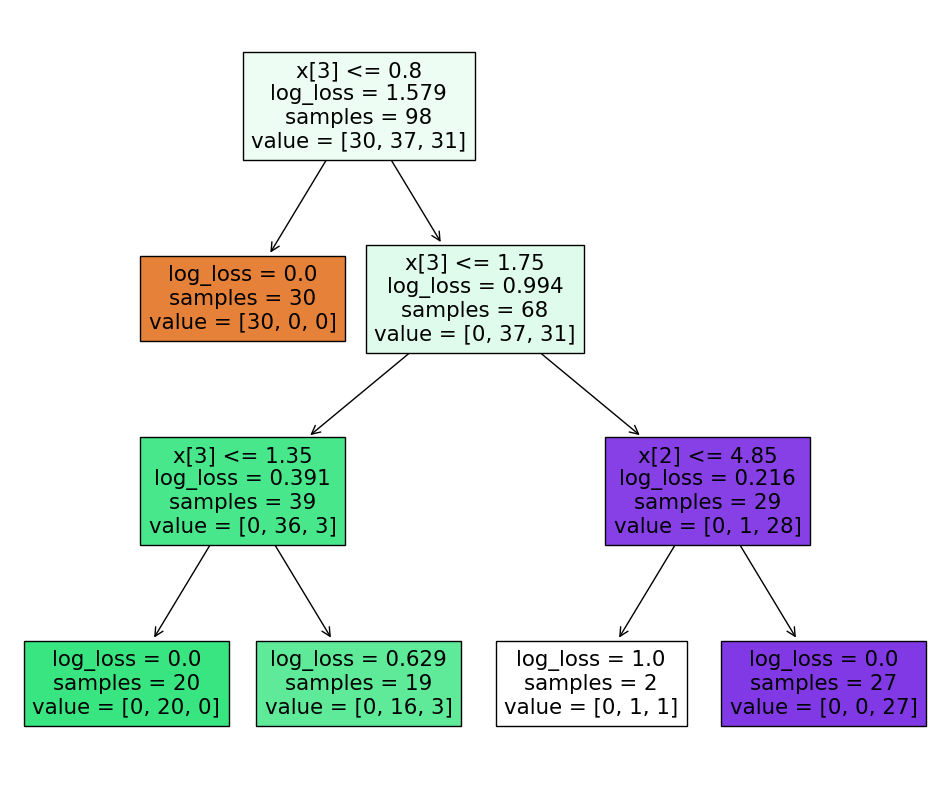

In [75]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)
plt.show()

In [76]:
y_pred = classifier.predict(X_test)

In [77]:
y_pred

array([2., 1., 2., 0., 1., 0., 1., 0., 1., 0., 0., 1., 2., 1., 2., 1., 0.,
       1., 1., 0., 0., 2., 0., 2., 1., 0., 1., 2., 1., 0., 2., 0., 2., 0.,
       0., 1., 2., 2., 0., 0., 0., 2., 1., 2., 1., 1., 2., 2., 0.])

In [78]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [79]:
confusion_matrix(y_test,y_pred)

array([[18,  0,  0],
       [ 0, 13,  0],
       [ 0,  3, 15]])

In [80]:
accuracy_score(y_test,y_pred)

0.9387755102040817